In [99]:
!pip install -U konlpy
!apt install -y fonts-nanum
!fc-cache -vf
!rm -rf ~/.cache/matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var

In [100]:
import pandas as pd

from collections import Counter
from konlpy.tag import Okt
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

In [101]:
korean_stopwords_path = "./korean_stopwords.txt"
with open(korean_stopwords_path, encoding="utf-8") as f:
    ko_stop_words = f.readlines()

ko_stop_words = [x.strip() for x in ko_stop_words]
okt = Okt()

reg_token = RegexpTokenizer("[\\w]+")
lemmatizer = WordNetLemmatizer()

In [102]:
# fname = "auto_sleep_kr_result.csv"
# fname = "forest_kr_result.csv"
fname = "sleep_town_kr_result.csv"
with open("csvs/store-sum/" + fname, "r") as f:
    reviews = [x.strip() for x in f.readlines() if x.strip()]
    print(len(reviews))

docs = []
for review in reviews[:1000]:
    text = okt.normalize(review)
    morphs = okt.morphs(text)

    doc = []
    for word in morphs:
        if len(word) > 1 and word not in ko_stop_words:
            doc.append(word)
    docs.append(doc)

1263


In [103]:
from functools import reduce
from operator import add
import re

if fname.startswith("auto"):
    nn = 20
elif fname.startswith("forest"):
    nn = 40
else:
    nn = 20

def filt(k, v):
    res = re.match("^[가-힣]+(?<![요다데게에은는고서도지])$", k) and v >= nn
    if fname.startswith("forest"):
        res = res and k != "처음" and k != "효과"
    return res

counts = [Counter(d) for d in docs]
total_counts = reduce(add, counts)
vocabs = sorted([k for k, v in total_counts.items() if filt(k, v)])
tf = pd.DataFrame(counts, columns=vocabs).fillna(0)
tf

,건물,결제,계속,구매,규칙,기능,기상,너무,다시,도움,...,있으면,정말,취침,타운,패턴,포레스트,프리미엄,하다가,하면,핸드폰
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
len(vocabs), vocabs

(40,
 ['건물',
  '결제',
  '계속',
  '구매',
  '규칙',
  '기능',
  '기상',
  '너무',
  '다시',
  '도움',
  '마을',
  '많이',
  '목표',
  '버튼',
  '사람',
  '사용',
  '생각',
  '생활',
  '서클',
  '설정',
  '소리',
  '소셜',
  '수면',
  '슬립',
  '습관',
  '아침',
  '알람',
  '어플',
  '오늘',
  '일찍',
  '있으면',
  '정말',
  '취침',
  '타운',
  '패턴',
  '포레스트',
  '프리미엄',
  '하다가',
  '하면',
  '핸드폰'])

In [105]:
corr = tf.corr()
corr

,건물,결제,계속,구매,규칙,기능,기상,너무,다시,도움,...,있으면,정말,취침,타운,패턴,포레스트,프리미엄,하다가,하면,핸드폰
건물,1.000000,0.016058,0.058877,0.028637,0.024210,0.019176,0.131591,0.112748,0.016329,-0.016657,...,0.138631,-0.046614,0.024669,0.094464,0.029025,0.013010,0.030054,0.095309,0.136640,0.061633
결제,0.016058,1.000000,-0.017956,-0.022608,-0.027636,-0.021889,0.045376,-0.001138,-0.021894,-0.031386,...,-0.015805,-0.019592,0.049629,0.061248,-0.024551,0.014325,0.518942,0.055816,0.096997,0.010752
계속,0.058877,-0.017956,1.000000,-0.022147,0.003692,-0.021443,0.050765,0.040065,0.146636,-0.030746,...,0.080483,0.010890,0.004671,-0.024269,-0.024050,-0.024518,0.063989,-0.017266,0.073150,0.014273
구매,0.028637,-0.022608,-0.022147,1.000000,0.024683,0.163429,-0.007358,0.009186,0.037215,0.065985,...,0.041616,-0.024166,-0.001751,-0.030557,0.054383,0.089641,0.094816,0.053226,0.030862,0.132950
규칙,0.024210,-0.027636,0.003692,0.024683,1.000000,-0.033002,-0.038483,0.057277,-0.033010,0.091857,...,-0.023829,-0.004074,-0.010203,-0.037352,-0.037016,-0.037736,-0.027778,0.006644,-0.038874,-0.009119
기능,0.019176,-0.021889,-0.021443,0.163429,-0.033002,1.000000,0.077278,0.060426,0.096795,0.096139,...,0.351583,0.049947,0.066919,-0.029585,0.006699,0.277717,0.053004,0.002870,0.029191,0.017400
기상,0.131591,0.045376,0.050765,-0.007358,-0.038483,0.077278,1.000000,0.028134,0.156407,0.051512,...,0.133604,0.077247,0.162909,-0.013203,0.068477,0.008987,0.002851,-0.024544,0.078077,0.018872
너무,0.112748,-0.001138,0.040065,0.009186,0.057277,0.060426,0.028134,1.000000,0.026477,-0.048525,...,0.018536,0.007961,0.010743,0.014487,0.043544,0.037852,-0.015445,0.026269,0.102759,0.043051
다시,0.016329,-0.021894,0.146636,0.037215,-0.033010,0.096795,0.156407,0.026477,1.000000,-0.012141,...,0.099480,0.087904,-0.024924,0.027097,-0.029325,0.047907,-0.022006,-0.021053,0.151257,-0.016566
도움,-0.016657,-0.031386,-0.030746,0.065985,0.091857,0.096139,0.051512,-0.048525,-0.012141,1.000000,...,0.021177,-0.010865,-0.016795,0.026894,0.024795,0.036419,-0.000619,-0.000592,-0.044149,-0.036585


In [106]:
from itertools import combinations

topk = 100
edges = [(v1, v2, corr.loc[v1, v2]) for v1, v2 in combinations(vocabs, 2)]
edges = sorted(edges, key=lambda x: x[-1], reverse=True)[:topk]
_, _, weights = zip(*edges)
edges

[('서클', '소셜', 0.7440092927797336),
 ('슬립', '타운', 0.717914557699898),
 ('결제', '프리미엄', 0.5189423127232213),
 ('기능', '소리', 0.509453677878278),
 ('사람', '있으면', 0.4764396819627364),
 ('수면', '패턴', 0.35642785894417467),
 ('설정', '취침', 0.35493239712014063),
 ('기능', '있으면', 0.35158334465914065),
 ('슬립', '포레스트', 0.34393825610919954),
 ('서클', '취침', 0.2967059250793672),
 ('소리', '포레스트', 0.29581073447115025),
 ('규칙', '생활', 0.28932161345856056),
 ('소리', '있으면', 0.2877141382459919),
 ('소셜', '취침', 0.28242165632664995),
 ('생활', '패턴', 0.28008080734715024),
 ('기능', '포레스트', 0.27771741422774965),
 ('소리', '알람', 0.27478925320489606),
 ('설정', '있으면', 0.25744072921552663),
 ('설정', '알람', 0.2527299235651775),
 ('건물', '아침', 0.24668213822401366),
 ('사람', '서클', 0.24042237220131266),
 ('있으면', '포레스트', 0.23754061638645457),
 ('수면', '습관', 0.237178404797205),
 ('하다가', '핸드폰', 0.2365144019964154),
 ('알람', '어플', 0.2357546540419953),
 ('사람', '소셜', 0.22826043584022362),
 ('서클', '있으면', 0.2221355099388726),
 ('목표', '설정', 0.212711130

In [107]:
import networkx as nx
import numpy as np

G = nx.Graph()
for v1, v2, w in edges:
  G.add_edge(v1, v2, weight=abs(np.log(w + 1) + 1))

nsize = tf[list(G.nodes)].sum().values
mn, mx = np.min(nsize), np.max(nsize)
nsize = 10000 * (np.log((nsize - mn) / (mx - mn) + 1)) + 1000
nsize

array([1782.521969  , 2100.00895214, 1172.9149711 , 1889.47486016,
       1229.89518225, 1000.        , 2306.20182417, 1510.02554452,
       1995.29595347, 1115.60822401, 5397.54181587, 1942.52538246,
       3137.97688896, 1942.52538246, 2755.15502325, 2100.00895214,
       1229.89518225, 2996.13053904, 7931.4718056 , 2255.0508175 ,
       3686.05925391, 1000.        , 3184.81538208, 4455.66966527,
       1000.        , 2357.09251925, 1115.60822401, 3277.83930871,
       1510.02554452, 2657.11502228, 1342.89073479, 1510.02554452,
       1000.        , 1995.29595347, 1115.60822401, 1836.14140041,
       4247.76196858, 3184.81538208, 1229.89518225])

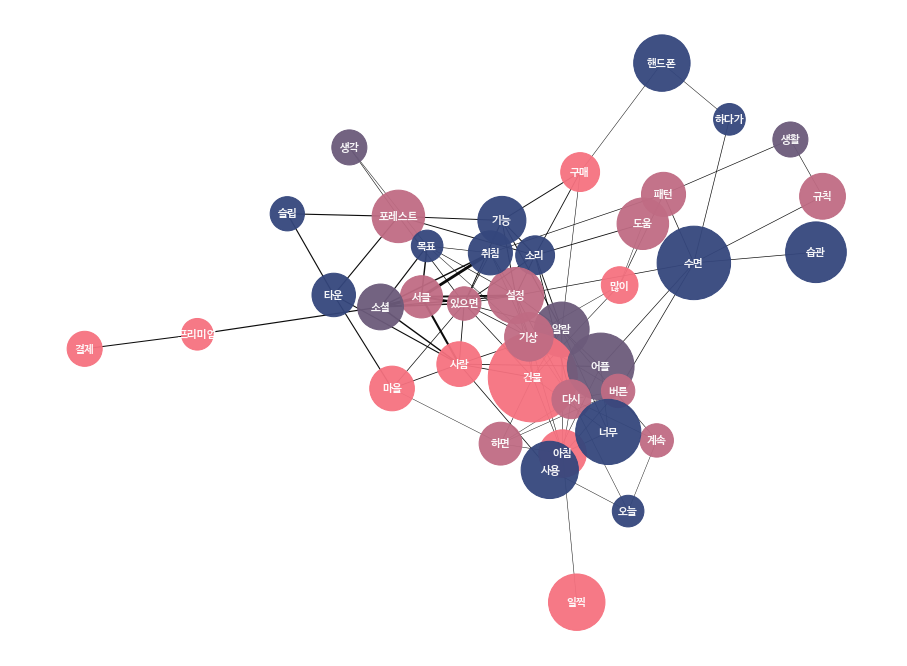

In [108]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib

plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(16, 12))
plt.axis('off')

if fname.startswith("auto"):
    seed = 0
elif fname.startswith("forest"):
    seed = 9
else:
    seed = 3

colors = ["#F67280", "#C06C84", "#6C5B7B", "#35477D"]
ncolor = [colors[i] for i in np.random.default_rng(seed=1).integers(0, len(colors), len(nsize))]
pos = nx.spring_layout(G, seed=seed)
nx.draw_networkx(G,
                 pos=pos,
                 with_labels=True,
                 font_family="NanumBarunGothic",
                 width=np.array(weights) * 4,
                #  edge_color='lightblue',
                 font_size=11,
                 node_color=ncolor,
                 node_size=nsize,
                 font_weight='semibold',
                 edge_cmap='gray',
                 font_color='white',
                 alpha=0.95)
                #  edgecolors='black',
                #  linewidths=0.1)
plt.savefig(f'{fname}.png', transparent=True, dpi=300)
plt.savefig(f'{fname}.svg', transparent=True)